In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# John
diamonds = pd.read_csv('https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_JohnD/master/datasets/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Find the max price of each cut and color combination
dmnd = diamonds.groupby(["cut","color"])["price"]

In [13]:
dmnd.min().reset_index().head(n=10)

,cut,color,price
0,Fair,D,536
1,Fair,E,337
2,Fair,F,496
3,Fair,G,369
4,Fair,H,659
5,Fair,I,735
6,Fair,J,416
7,Good,D,361
8,Good,E,327
9,Good,F,357


In [14]:
dmnd.max().reset_index().head(10)

,cut,color,price
0,Fair,D,16386
1,Fair,E,15584
2,Fair,F,17995
3,Fair,G,18574
4,Fair,H,18565
5,Fair,I,17408
6,Fair,J,15824
7,Good,D,18468
8,Good,E,18236
9,Good,F,18686


In [24]:
# Find the min, max, and average dimensions (x,y,z) of a diamond for each carat size
bySize = diamonds.groupby(["carat"])["x","y","z"]

In [28]:
bySize.mean().head(10)

,x,y,z
carat,,,
0.20,3.786667,3.753333,2.303333
0.21,3.874444,3.837778,2.332222
0.22,3.898000,3.848000,2.386000
0.23,3.946382,3.973379,2.431468
0.24,3.990157,4.019331,2.465591
0.25,4.062500,4.086934,2.506934
0.26,4.102688,4.124704,2.536364
0.27,4.159142,4.181588,2.567897
0.28,4.207172,4.233687,2.595707


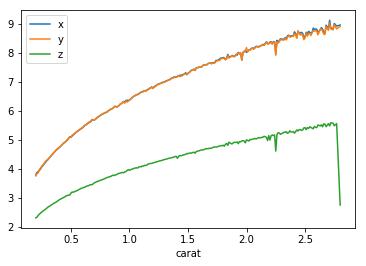

In [29]:
bySize.mean().plot()

In [4]:
# Min-Yao
xprs = pd.read_excel('https://github.com/UCD-pbio-rclub/python-data-analysis_MinYaoJ/raw/master/Expression%20Browser_CPM_practice.xlsx')

In [10]:
import re
from collections import Counter
sampleGroups = [re.sub(pattern="..$",repl="",string=each) for each in xprs.columns[1:].tolist()]
Counter(sampleGroups)

Counter({'6_c': 7,
         '6_t': 7,
         '5_c': 5,
         '5_t': 7,
         '3_c': 5,
         '3_t': 5,
         '2_c': 5,
         '2_t': 4})

In [12]:
gene = "Solyc03g080180.3"
tmpXprs = xprs[xprs.Name == gene].T[1:]
tmpXprs["groups"] = sampleGroups
tmpXprs.columns = [gene, 'groups']
tmpXprs.head()

,Solyc03g080180.3,groups
6_c1,138.535,6_c
6_c2,138.826,6_c
6_c3,134.073,6_c
6_c4,145.79,6_c
6_c5,148.217,6_c


In [73]:
tmp = xprs[xprs.Name=="Solyc03g080180.3"].iloc[:,1:].T
tmp.groupby(sampleGroups).mean()

,9997
2_c,367.974577
2_t,370.869849
3_c,166.597921
3_t,335.094112
5_c,494.704924
5_t,323.150899
6_c,159.040833
6_t,391.707410


Text(0.5, 0.98, '')

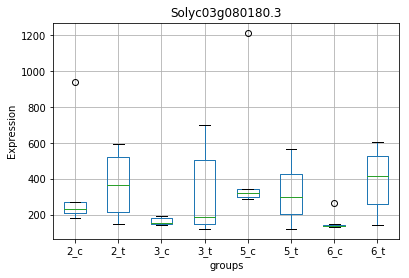

In [17]:
tmpXprs.boxplot(by="groups",column=gene)
plt.ylabel("Expression")
plt.suptitle("")

In [77]:
## Grouping by chromosome number, please find which gene has the highest average expression level, and which gene has the largest expression level changes.
byChr = [re.sub(pattern="g.*$",repl="",string=each) for each in xprs.Name.tolist()]

In [88]:
# Define a function to get the fold change: ratio between min and max 
FC = lambda x: x.max() / x.min()

In [93]:
xprs.groupby(byChr).mean().T.describe()

,Solyc00,Solyc01,Solyc02,Solyc03,Solyc04,Solyc05,Solyc06,Solyc07,Solyc08,Solyc09,Solyc10,Solyc11,Solyc12
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,3.362684,30.794614,25.993234,24.849949,33.263263,25.741451,41.439640,30.016820,29.648035,32.297513,24.915666,27.195341,25.984288
std,0.460994,2.032703,1.120701,1.530648,3.313549,3.219650,4.237895,1.648566,2.163105,2.413745,2.502233,2.389024,1.726157
min,2.784466,27.130847,23.997933,22.345686,29.135690,20.964988,34.504001,26.229589,26.474141,29.108940,21.577428,22.720997,22.967747
25%,3.023449,29.074550,25.305285,23.693272,30.612010,23.320330,39.392938,28.740739,28.320395,30.420957,23.164896,25.787473,24.718965
50%,3.137030,30.836338,25.993082,25.032042,32.363164,25.396055,41.302586,30.067238,29.418653,31.974280,24.435937,26.919114,25.944554
75%,3.677796,31.416144,26.714648,25.865306,34.351465,27.253666,43.153977,31.317043,30.597187,33.759367,26.482273,28.356434,27.059420
max,4.404835,38.060335,29.894598,30.108179,42.921686,37.697512,55.802291,33.045954,38.626361,40.833969,33.539004,34.550442,32.141371


In [91]:
xprs.groupby(byChr).mean().T.mean().reset_index()

,index,0
0,Solyc00,3.362684
1,Solyc01,30.794614
2,Solyc02,25.993234
3,Solyc03,24.849949
4,Solyc04,33.263263
5,Solyc05,25.741451
6,Solyc06,41.439640
7,Solyc07,30.016820
8,Solyc08,29.648035
9,Solyc09,32.297513


In [92]:
xprs.groupby(byChr).mean().T.apply(FC).reset_index()

,index,0
0,Solyc00,1.581932
1,Solyc01,1.402844
2,Solyc02,1.245716
3,Solyc03,1.347382
4,Solyc04,1.473165
5,Solyc05,1.798117
6,Solyc06,1.617270
7,Solyc07,1.259873
8,Solyc08,1.459022
9,Solyc09,1.402798


In [44]:
# Kae
titanic = pd.read_csv('https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_KaeL/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
survs = titanic.groupby(["Embarked"])["Survived"]

In [38]:
survs.sum().reset_index()

,Embarked,Survived
0,C,93
1,Q,30
2,S,217


Text(0.5, 1.0, 'Total survivors per class')

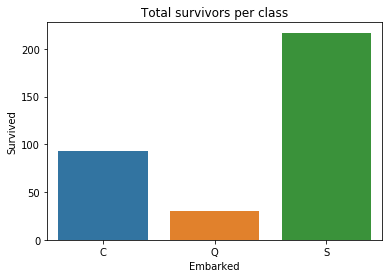

In [69]:
import seaborn as sns
sns.barplot(data=survs.sum().reset_index(),
            x="Embarked",y="Survived").set_title('Total survivors per class')

In [63]:
survs.count().reset_index()

,Embarked,Survived
0,C,168
1,Q,77
2,S,644


In [62]:
survs.sum().reset_index()

,Embarked,Survived
0,C,93
1,Q,30
2,S,217


In [59]:
percentSurvival=((titanic.groupby(["Embarked"])["Survived"].sum()/titanic.groupby(["Embarked"])["Survived"].count())*100).reset_index()
percentSurvival

,Embarked,Survived
0,C,55.357143
1,Q,38.961039
2,S,33.695652


Text(0.5, 1.0, '% survivors per class')

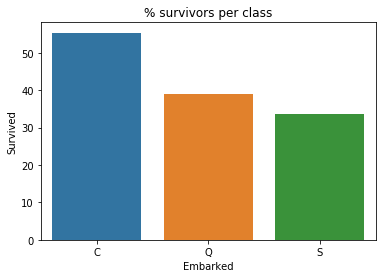

In [70]:
sns.barplot(data=percentSurvival,
            x="Embarked",y="Survived").set_title('% survivors per class')

In [94]:
## Rie
candy = pd.read_csv('https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_RieU/master/Assignment/candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [98]:
candy["competitorname"].groupby(candy["chocolate"]).count()

chocolate
0    48
1    37
Name: competitorname, dtype: int64

In [100]:
candy[["sugarpercent","pricepercent","winpercent"]].groupby(candy["chocolate"]).mean()

,sugarpercent,pricepercent,winpercent
chocolate,,,
0,0.452937,0.343021,42.142257
1,0.512000,0.632162,60.921529
